## Classification of Sub Species of Bees By Transfer Learning 



## Required Libraries

Necessary libraries are imported and loaded.

In [2]:
import pandas as pd
import numpy as np
import seaborn as snsaa
import matplotlib.pyplot as plt

import skimage
import skimage.io
import skimage.transform
import random
import sys 
import os
import imageio

import scipy
from sklearn.model_selection import train_test_split
from sklearn import metrics

import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
#from tf.keras.preprocessing.image import ImageDataGenerator

## Data Preprocessing

Data Frame is created and structured from the csv file.

In [3]:
Img_path = 'D:/Semester_4/DL/Project/bee_imgs/bee_imgs/'
Img_width = 100
Img_height = 100
Img_channel = 3

#Random_state = 2018


In [4]:
#os.listdir("D:/Semester_4/DL/Project")
bee_df = pd.read_csv('D:/Semester_4/DL/Project/bee_data.csv')
bee_df.shape
bee_df.head(n=10)

,file,date,time,location,zip code,subspecies,health,pollen_carrying,caste
0,041_066.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
1,041_072.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
2,041_073.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
3,041_067.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
4,041_059.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
5,041_071.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
6,041_065.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
7,041_064.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
8,041_070.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
9,041_058.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker


In [5]:
img_files = list(os.listdir(Img_path))
print(len(img_files))

5172


In [6]:
file_names = list(bee_df['file'])
print(len(file_names))

5172


In [7]:
def read_image_size(file_name):
    image = skimage.io.imread(Img_path+file_name)
    return list(image.shape)

In [8]:
m = np.stack(bee_df['file'].apply(read_image_size))
df = pd.DataFrame(m,columns = ['w','h','c'])
bee_df = pd.concat([bee_df,df],axis = 1,sort=False)
bee_df.head(n=10)

,file,date,time,location,zip code,subspecies,health,pollen_carrying,caste,w,h,c
0,041_066.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker,115,164,3
1,041_072.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker,201,90,3
2,041_073.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker,132,167,3
3,041_067.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker,134,97,3
4,041_059.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker,147,106,3
5,041_071.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker,194,135,3
6,041_065.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker,159,170,3
7,041_064.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker,132,95,3
8,041_070.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker,126,190,3
9,041_058.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker,156,189,3


## Subspecies catagorization

Subspecies of bees are shown with no.of available images for each subspecies.

In [9]:
temp = bee_df.groupby(['caste'])['subspecies'].value_counts()
df = pd.DataFrame(data = {'Images':temp.values}, index=temp.index)
df.reset_index()


,caste,subspecies,Images
0,worker,Italian honey bee,3008
1,worker,Russian honey bee,527
2,worker,Carniolan honey bee,501
3,worker,1 Mixed local stock 2,472
4,worker,-1,428
5,worker,VSH Italian honey bee,199
6,worker,Western honey bee,37


In [10]:
def draw_category_images(var,cols=5):
    categories = (bee_df.groupby([var])[var].nunique()).index
    f, ax = plt.subplots(nrows=len(categories),ncols=cols, figsize=(2*cols,2*len(categories)))
    # draw a number of images for each location
    for i, cat in enumerate(categories):
        sample = bee_df[bee_df[var]==cat].sample(cols)
        for j in range(0,cols):
            file=Img_path + sample.iloc[j]['file']
            im=imageio.imread(file)
            ax[i, j].imshow(im, resample=True)
            ax[i, j].set_title(cat, fontsize=9)  
    plt.tight_layout()
    plt.show()

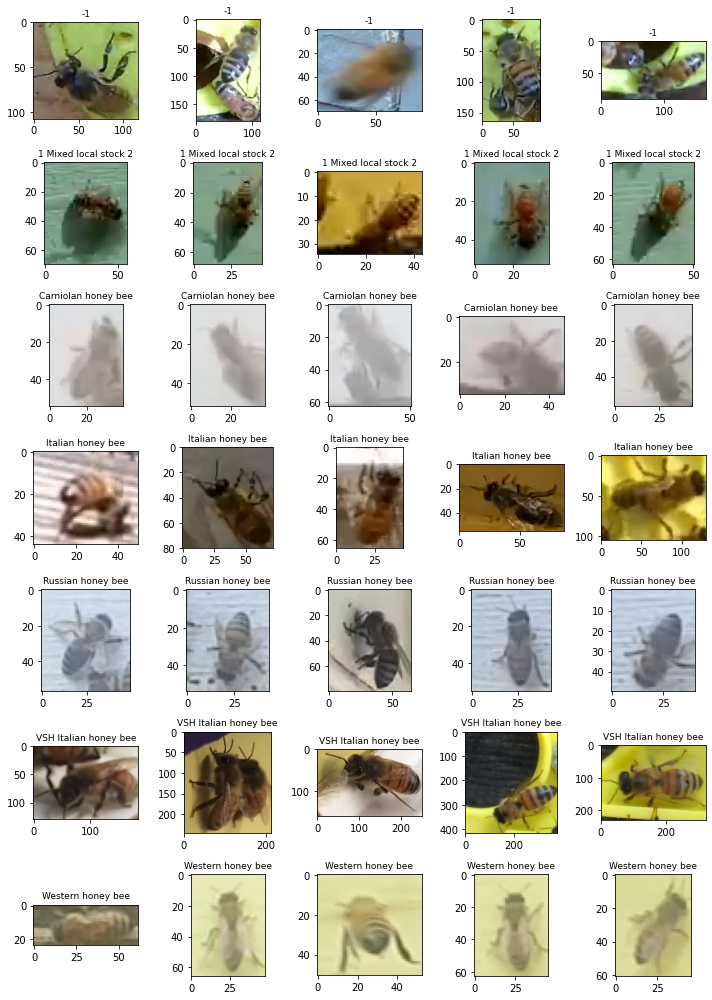

In [11]:
draw_category_images("subspecies")

Sample images of bees of different subspecies.

# Sub species Classification

## Data preparation for Model

Creating random dataset of Train, Test and Validation.

In [12]:
train_data, test_data = train_test_split(bee_df, test_size = 0.2, random_state = 2018, stratify = bee_df['subspecies'] )

In [13]:
train_data, val_data = train_test_split(train_data, test_size = 0.2, random_state = 2018, stratify = train_data['subspecies'] )

In [14]:
print("Train set rows: {}".format(train_data.shape[0]))
print("Test  set rows: {}".format(test_data.shape[0]))
print("Val   set rows: {}".format(val_data.shape[0]))

Train set rows: 3309
Test  set rows: 1035
Val   set rows: 828


## Data Augumentation

In [15]:
def read_image(file_name):
    image = skimage.io.imread(Img_path+file_name)
    image = skimage.transform.resize(image,(Img_width,Img_height),mode='reflect')
    return image[:,:,:Img_channel]

In [16]:
def categories_encoder(dataset, var='subspecies'):
    X = np.stack(dataset['file'].apply(read_image))
    y = pd.get_dummies(dataset[var], drop_first=False)
    return X, y

In [17]:
X_train, y_train = categories_encoder(train_data)
X_val, y_val = categories_encoder(val_data)
X_test, y_test = categories_encoder(test_data)

In [18]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=180,
        zoom_range = 0.1, 
        width_shift_range=0.1,
        height_shift_range=0.1, 
        horizontal_flip=True,
        vertical_flip=True)
image_generator.fit(X_train)


## Transfer Learning Model

VGG19 model pre-loaded with weights trained on ImageNet. By specifying the include_top=False argument, we load a network that doesn't include the classification layers, which is ideal for feature extraction.

In [19]:
IMG_SHAPE = (Img_width, Img_height, 3)

# Create the base model from the pre-trained model MobileNet V2
feature_extractor = tf.keras.applications.vgg19.VGG19(input_shape=IMG_SHAPE,
                                                include_top=False,
                                                weights= 'imagenet')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


## Feature Extraction

We will freeze the layers of the VGG19 and utilize the feature extractor capabilities of this part of the network. By adding a classification layer on top of it and training the top-level classifier on our data we repurpose the pretrained model. Freezing means keeping the respective weights from updating in the weight update phase of the training process.

In [20]:
feature_extractor.trainable = False

feature_extractor.summary()


Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

1. The classification layer is added here to the base model with required no of outputs. And new combined model is compiled

2. The activation function used here is softmax as we needed a probability distribution.

3.  The loss function used is categorical_crossentropy as this is a multi-class classification task.
4.  Optimizer used is RMSprop as it uses a moving average of squared gradients to normalize the gradient itself. That has an effect of balancing the step size — decrease the step for large gradient to avoid exploding, and increase the step for small gradient to avoid vanishing



In [21]:
model = tf.keras.Sequential([
  feature_extractor,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(y_train.columns.size, activation='softmax')
])
#'''By doing a global average we make the convolution invariant to where the object of interest is and this acts as a data augmentaiton of moving the object around to different regions. This prevents overfitting of the fc layers.'''
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 3, 3, 512)         20024384  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 7)                 3591      
Total params: 20,027,975
Trainable params: 3,591
Non-trainable params: 20,024,384
_________________________________________________________________


1. Epochs is selected as 50 as the model seems to perform well with increased epochs. 
2. Batch size is decided to be 32 as batch size plays an influential role. Batch size when it is more the learning process seems to be quick and there is drop in performance and similarly when too low it learns before processing and tend to predict wrongly.

In [22]:
EPOCHS = 50 
BATCH_SIZE = 32

train_model1  = model.fit_generator(image_generator.flow(X_train, y_train, batch_size= BATCH_SIZE),
                        epochs= EPOCHS,
                        verbose = 2,
                        validation_data=image_generator.flow(X_val, y_val),
                        steps_per_epoch= len(X_train)/BATCH_SIZE)

Epoch 1/50
104/103 - 124s - loss: 0.9967 - acc: 0.6652 - val_loss: 0.7247 - val_acc: 0.7560
Epoch 2/50
104/103 - 126s - loss: 0.7302 - acc: 0.7419 - val_loss: 0.8535 - val_acc: 0.7029
Epoch 3/50
104/103 - 125s - loss: 0.6532 - acc: 0.7513 - val_loss: 0.6267 - val_acc: 0.7572
Epoch 4/50
104/103 - 125s - loss: 0.6022 - acc: 0.7749 - val_loss: 0.5821 - val_acc: 0.7995
Epoch 5/50
104/103 - 125s - loss: 0.5709 - acc: 0.7863 - val_loss: 0.5631 - val_acc: 0.7766
Epoch 6/50
104/103 - 133s - loss: 0.5583 - acc: 0.7866 - val_loss: 0.5086 - val_acc: 0.8176
Epoch 7/50
104/103 - 128s - loss: 0.5614 - acc: 0.7875 - val_loss: 0.4852 - val_acc: 0.8080
Epoch 8/50
104/103 - 131s - loss: 0.5351 - acc: 0.8069 - val_loss: 0.6261 - val_acc: 0.7512
Epoch 9/50
104/103 - 128s - loss: 0.4994 - acc: 0.8117 - val_loss: 0.4904 - val_acc: 0.8297
Epoch 10/50
104/103 - 124s - loss: 0.5086 - acc: 0.8078 - val_loss: 0.5322 - val_acc: 0.7995
Epoch 11/50
104/103 - 125s - loss: 0.5121 - acc: 0.8039 - val_loss: 0.4758 - va

## Model Evaluation

In [23]:
def create_trace(x,y,ylabel,color):
        trace = go.Scatter(
            x = x,y = y,
            name=ylabel,
            marker=dict(color=color),
            mode = "markers+lines",
            text=x
        )
        return trace
    
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['acc']
    val_acc = hist['val_acc']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = list(range(1,len(acc)+1))
    #define the traces
    trace_ta = create_trace(epochs,acc,"Training accuracy", "Green")
    trace_va = create_trace(epochs,val_acc,"Validation accuracy", "Red")
    trace_tl = create_trace(epochs,loss,"Training loss", "Blue")
    trace_vl = create_trace(epochs,val_loss,"Validation loss", "Magenta")
    fig = tools.make_subplots(rows=1,cols=2, subplot_titles=('Training and validation accuracy',
                                                             'Training and validation loss'))
    #add traces to the figure
    fig.append_trace(trace_ta,1,1)
    fig.append_trace(trace_va,1,1)
    fig.append_trace(trace_tl,1,2)
    fig.append_trace(trace_vl,1,2)
    #set the layout for the figure
    fig['layout']['xaxis'].update(title = 'Epoch')
    fig['layout']['xaxis2'].update(title = 'Epoch')
    fig['layout']['yaxis'].update(title = 'Accuracy', range=[0,1])
    fig['layout']['yaxis2'].update(title = 'Loss', range=[0,1])
    #plot
    iplot(fig, filename='accuracy-loss')



In [24]:
plot_accuracy_and_loss(train_model1)

As expected, the error on the training and validation set is high in the beginning
and both start to decline as we increase the epoch.

## Test Results

In [25]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5160899335059567
Test accuracy: 0.81642514


## Test accuracy Report

In [26]:
def test_accuracy_report(model):
    predicted = model.predict(X_test)
    test_predicted = np.argmax(predicted, axis=1)
    test_truth = np.argmax(y_test.values, axis=1)
    print(metrics.classification_report(test_truth, test_predicted, target_names=y_test.columns)) 
    test_res = model.evaluate(X_test, y_test.values, verbose=0)
    print('Loss function: %s, accuracy:' % test_res[0], test_res[1])

In [27]:
test_accuracy_report(model)

                       precision    recall  f1-score   support

                   -1       0.56      0.73      0.64        86
1 Mixed local stock 2       0.90      0.57      0.70        94
  Carniolan honey bee       0.88      1.00      0.94       100
    Italian honey bee       0.85      0.88      0.86       602
    Russian honey bee       0.77      0.80      0.78       106
VSH Italian honey bee       0.93      0.33      0.48        40
    Western honey bee       0.75      0.43      0.55         7

             accuracy                           0.82      1035
            macro avg       0.81      0.68      0.71      1035
         weighted avg       0.83      0.82      0.81      1035

Loss function: 0.5160899335059567, accuracy: 0.81642514
